# Type 1 transition 

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
from tyssue.core.sheet import Sheet

## Geometry, model and solver
from tyssue.geometry.sheet_geometry import SheetGeometry
from tyssue.dynamics.sheet_vertex_model import SheetModel
from tyssue.solvers.sheet_vertex_solver import Solver
from tyssue.config.geometry import cylindrical_sheet
from tyssue.config.dynamics import quasistatic_sheet_spec

from tyssue.dynamics.sheet_isotropic_model import isotropic_relax



from tyssue.draw.plt_draw import sheet_view
import tyssue.draw.plt_draw as draw
from tyssue.io import hdf5

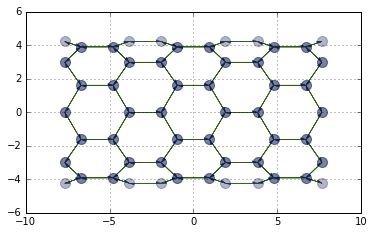

In [2]:
h5store = '../examples/small_hexagonal.hf5'
datasets = hdf5.load_datasets(h5store,
                              data_names=['face', 'vert', 'edge'])
specs = cylindrical_sheet()
sheet = Sheet('emin', datasets, specs)


SheetGeometry.update_all(sheet)

nondim_specs = quasistatic_sheet_spec()
dim_model_specs = SheetModel.dimentionalize(nondim_specs)

sheet.update_specs(dim_model_specs, reset=True)
sheet.grad_norm_factor = sheet.specs['settings']['grad_norm_factor']
sheet.nrj_norm_factor = sheet.specs['settings']['nrj_norm_factor']

isotropic_relax(sheet, nondim_specs)

solver_settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-4},
        }
    }



live_edge = sheet.upcast_face(sheet.face_df.is_alive).astype(np.bool)
dead_edge = np.logical_not(live_edge)
inactive_verts = set(sheet.edge_df[dead_edge].srce)

active_verts = set(sheet.vert_df.index).difference(inactive_verts)
active_verts = list(active_verts)
sheet.vert_df.is_active = 0
sheet.vert_df.loc[active_verts, 'is_active'] = 1

fig, ax = sheet_view(sheet, ['z', 'x'])

True


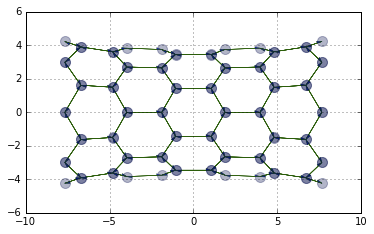

In [3]:
res = Solver.find_energy_min(sheet, SheetGeometry, SheetModel, pos_idx=active_verts, 
                             **solver_settings)
print(res['success'])
fig, ax = sheet_view(sheet, ['z', 'x'])

In [4]:
from tyssue.topology.sheet_topology import type1_transition

![Type 1 transition](../../doc/illus/t1_transition.png)

In [5]:
type1_transition(sheet, 84)
SheetGeometry.update_all(sheet)


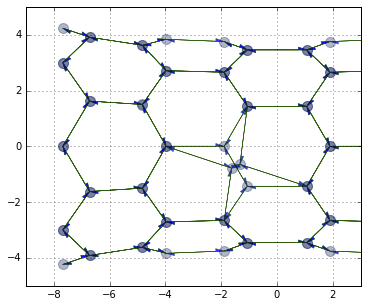

In [6]:

fig, ax = sheet_view(sheet, ['z', 'x'])

ax.set_ylim(-5, 5)
ax.set_xlim(-9, 3)

ax.set_aspect('equal')
fig.set_size_inches(8, 5)


True


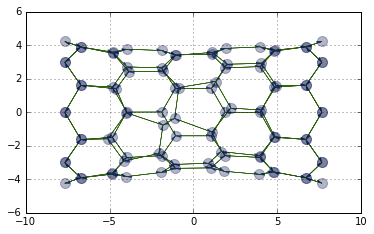

In [7]:
settings = {
    'minimize': {
        'options': {'disp':True,
        'gtol':1e-6},
        }
    }


res = Solver.find_energy_min(sheet, SheetGeometry, SheetModel, **settings)
print(res['success'])
fig, ax = sheet_view(sheet, ['z', 'x'])